In [1]:
import environ

env = environ.Env()
environ.Env.read_env()
#Todo only load the repo folder
DataSetsPath     = env('DataSetsPath')     #* get the path of the script
ModelsPath       = env('ModelsPath')       #* get the path of the script
fitToolsPath     = env('fitToolsPath')     #* get the path of the script
TestNotebooks    = env('TestNotebooks')    #* get the path of the script   
dataPreparation  = env('dataPreparation')  #* get the path of the script
model_save_dir   = env('model_save_dir')   #* get the path w\here we will save the model
DataSet_Brain_MRI_segmentation   = env('DataSet_Brain_MRI_segmentation')   #* get the path where we will save the model
newFoldersPath   =   env('newFoldersPath')


import sys
sys.path.append(DataSetsPath)
sys.path.append(ModelsPath)
sys.path.append(fitToolsPath)
sys.path.append(TestNotebooks)
sys.path.append(dataPreparation)


import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"
print("device = ", device)

device =  cuda


In [2]:
image_Height   = 572
image_Width    = 572
image_Channels = 1
batch_size     = 16

In [3]:
# import importlib
# import dataPreparation.brain_MRI_segmentation_preparation 
# importlib.reload(dataPreparation.brain_MRI_segmentation_preparation)
# from dataPreparation.brain_MRI_segmentation_preparation import preparation_brain_MRI_Set

# newFoldersPath =   "C:/Users/malekir1/Documents/dataSets/Brain-MRI-segmentation-prepaer"
# preparation_brain_MRI_Set(DataSet_Brain_MRI_segmentation, newFoldersPath)



In [5]:
from DataSets.dataSet_Img_Vs_Img import DataSet_Img_To_Img
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, RandomSampler


inputResize = transforms.Compose([
    transforms.ToPILImage(),  # Convert to PIL Image
    transforms.Resize((image_Height, image_Width)),  # Resize the image
    transforms.Grayscale(num_output_channels=1),  # Convert to black and white
    transforms.ToTensor(),  # Convert to tensor
])


outPutResize = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((388, 388)),
                        # transforms.RandomRotation(degrees=5),  # Randomly rotate the image by up to 5 degrees
                                        
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        # transforms.RandomVerticalFlip(),
                        # transforms.RandomHorizontalFlip(),
                        # transforms.RandomRotation(degrees=15),  
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])

root_Data = [newFoldersPath + "/img", newFoldersPath + "/mask"]

myDataSet  = DataSet_Img_To_Img(root_Data, transfor_In_img = inputResize, transfor_Out_img = outPutResize, test = False, dataSize = 100)


Size data set lower definition 3929


image_array.shape =  (572, 572, 1)


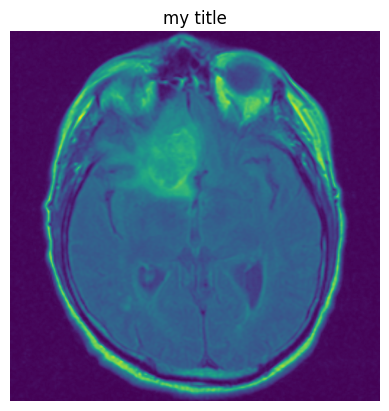

image_array.shape =  (388, 388, 1)


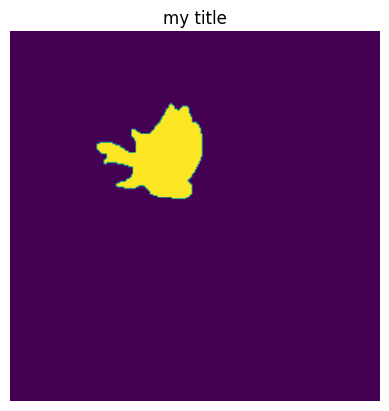

In [6]:

from TestNotebooks.toolsTest import plot_img_tensor


index = 3
plot_img_tensor(myDataSet.__getitem__(index=index)[0], plot_channels = [0])
plot_img_tensor(myDataSet.__getitem__(index=index)[1], plot_channels = [0])


In [7]:
import importlib
import Models.model_U_Net

importlib.reload(Models.model_U_Net)
from Models.model_U_Net import model_U_Net


myModel = model_U_Net()
myModel.to(device = device)


# for (imgInput, imgOutPut) in trainerModel.data_loader:
#     imgInput  =  imgInput.to(device)
#     imgOutPut = imgOutPut.to(device)
#     opt_model.zero_grad()
#     print(imgOutPut.shape) #*1,572, 572])
#     modelOutPut = myModel(imgOutPut)
#     break

model_U_Net(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): SiLU()
  )
  (conv2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): SiLU()
  )
  (maxPol1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): SiLU()
  )
  (conv4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): SiLU()
  )
  (maxPol2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): SiLU()
  )
  (conv6): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): SiLU()
  )
  (maxPol3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv7): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (1): SiLU()
  )
 

In [8]:
import importlib

import fitTools.fitFunctions_superResolution
importlib.reload(fitTools.fitFunctions_superResolution)
from fitTools.fitFunctions_superResolution import fiterU_Net

import torch.nn as nn
from torch import optim
import torch.nn.functional as F


opt_model = optim.Adam(myModel.parameters(), lr = 0.001)

trainerModel = fiterU_Net(myModel, 
                        myDataSet, 
                        device      = device,
                        batch_size = batch_size,
                        # criterion   = criterion, 
                        # dataSet_Val = myDataSet,
                        model_save_dir =  model_save_dir)


In [11]:
trainerModel.trainModel(opt_model = opt_model, num_epochs = 1) #* 

  0%|          | 0/246 [00:00<?, ?it/s]C:\Users\malekir1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Epoch 1/1 process: 5:   6%|▌         | 15/246 [07:25<1:51:06, 28.86s/it, modelLoss=5.13]